In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
dataset = pd.read_csv('BR_mod.csv')
dataset.head()

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,...,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,NaN,...,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,NaN,1.0,1.0,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,...,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1


# Data Preprocessing

In [ ]:
# missing_values = pd.DataFrame(dataset.isnull().sum())
# missing_values = missing_values.rename(columns={0:'missing_nos'})
# missing_values['Mean'] = 0
# missing_values['Mode'] = 0
# missing_values['Median'] = 0
# for i in range(len(dataset.columns)):
#     missing_values.iloc[i,1] = dataset.iloc[:,i].mean()
#     missing_values.iloc[i,2] = dataset.iloc[:,i].mode()
#     missing_values.iloc[i,3] = dataset.iloc[:,i].median()
# missing_values

In [2]:
# filling missing values with previous values also known as filling forward technique
# this technique is found more suitable as less variations are obserbed in mean, mode and median of processed data that from original data

for i in range(len(dataset.columns)):
    for j in range(len(dataset)):
        if pd.isnull(dataset.iloc[j,i]):
            dataset.iloc[j,i] = dataset.iloc[j-1,i] 

In [3]:
#creating 2-D array of dataset
X = dataset.values
X.shape

(1097, 24)

# K_MEDOIDS

In [4]:
def initiate_medoids(X, k):
    samples = np.random.choice(len(X), size=k, replace=False)
    return X[samples, :]

In [5]:
def compute_dist(X, medoids):
    m = len(X) 
    k = len(medoids)
    S = np.empty([m, k])
    dist_arr = [0]*m
    for i in range(m):
        min = 99999
        for j in range(k):
            S[i,j] = np.sqrt(sum(np.square(X[i]-medoids[j])))
            if S[i,j] < min: min = S[i,j]
        dist_arr[i] = min
    cost = np.sum(dist_arr)
    return (S,cost)

In [6]:
def update_medoids(X, medoids, S):
    
    upd_medoids = medoids
    cluster_n = np.argmin(S[0],axis=1)
    print("initial medoids: ",medoids)
    
    for i in set(cluster_n):    
        prev_cost = S[1]
        print("For cluster",i)
        cluster_points = X[cluster_n == i]
        print("length: ",len(cluster_points))
#         print('Prev_cost: ',prev_cost)
#         print("initial medoids: ",medoids)
        
        temp = medoids
        for datap in cluster_points: 
            temp[i] = datap
            new_cost = compute_dist(X, temp)[1]
            
            if new_cost < prev_cost:
                prev_cost = new_cost
                upd_medoids[i] = datap

    return upd_medoids

In [7]:
## driving function for the k-medoids algorithm as a whole on a dataset given as an array

def kmedoids(X, k, iteration=10):
    
    medoids = initiate_medoids(X, k)
    converged = False
    cluster_arr = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= iteration):
        print("Iteration: ",i,"\n")
        old_medoids = medoids.copy()
        
        S = compute_dist(X, medoids)
        
        cluster_arr = np.argmin(S[0], axis=1)
        
        medoids = update_medoids(X, medoids, S)
        print("Updated medoids: ",medoids)
        
        converged = (set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids]))
        i += 1
    return medoids,cluster_arr

In [8]:
## Taking k = 4, as after running elbow method on dataset, it is found to be elbow point 
## hence further increase in k value will result in less intercluster distance and more intracluster distance
## Above point is verified by keeping k-value higher than the 4 and resulting clusters when visualised on 2-D plane were intertwined into one another

k = 4
medoids,cluster_arr = kmedoids(X,k)


#print(centroids)
#printing clusters

cluster_n = set(cluster_arr)

clusters = []
for value in cluster_n:
    cluster_i= []
    for index in range(len(cluster_arr)):
        if cluster_arr[index] == value:
            cluster_i.append(index)
    clusters.append(cluster_i)

print("Indexes of cluster points\n")
for value in cluster_n:
    print("Medoid ",value,':',medoids[value])
    print("Cluster",value,": ",clusters[value],"\n")

Iteration:  1 

initial medoids:  [[79.   1.4  3.   1.   0.   2.   1.   1.   0.   0.   1.  14.   0.   2.
   2.   0.   0.   1.  10.   0.  12.   8.   0.   7. ]
 [61.   0.2  0.   1.   1.   1.   1.   1.   0.   0.   0.  15.   0.   2.
   4.   0.   0.   2.   8.   2.  10.   5.   0.  11. ]
 [56.   0.8  4.   1.   1.   2.   1.   1.   0.   0.   0.   4.   0.   2.
   0.   0.   0.   2.   5.   0.   2.   5.   0.  14. ]
 [45.   0.2  0.   1.   0.   1.   1.   1.   0.   1.   1.  10.   0.   3.
   6.   0.   0.   2.   8.   0.   9.   5.   1.  18. ]]
For cluster 0
length:  166
For cluster 1
length:  271
For cluster 2
length:  422
For cluster 3
length:  238
Updated medoids:  [[82.   0.   3.   1.   0.   3.   1.   1.   0.   0.   0.  16.   0.   2.
   2.   1.   0.   1.   8.   2.   5.   8.   1.  32. ]
 [75.   1.4  3.   1.   1.   1.   1.   1.   0.   6.   1.  18.   1.   2.
   5.   0.   0.   1.   8.   0.  10.   4.   0.  35. ]
 [61.   0.8  3.   1.   1.   2.   1.   2.   0.   0.   0.   5.   1.   2.
   3.   1.   0.   2.   8

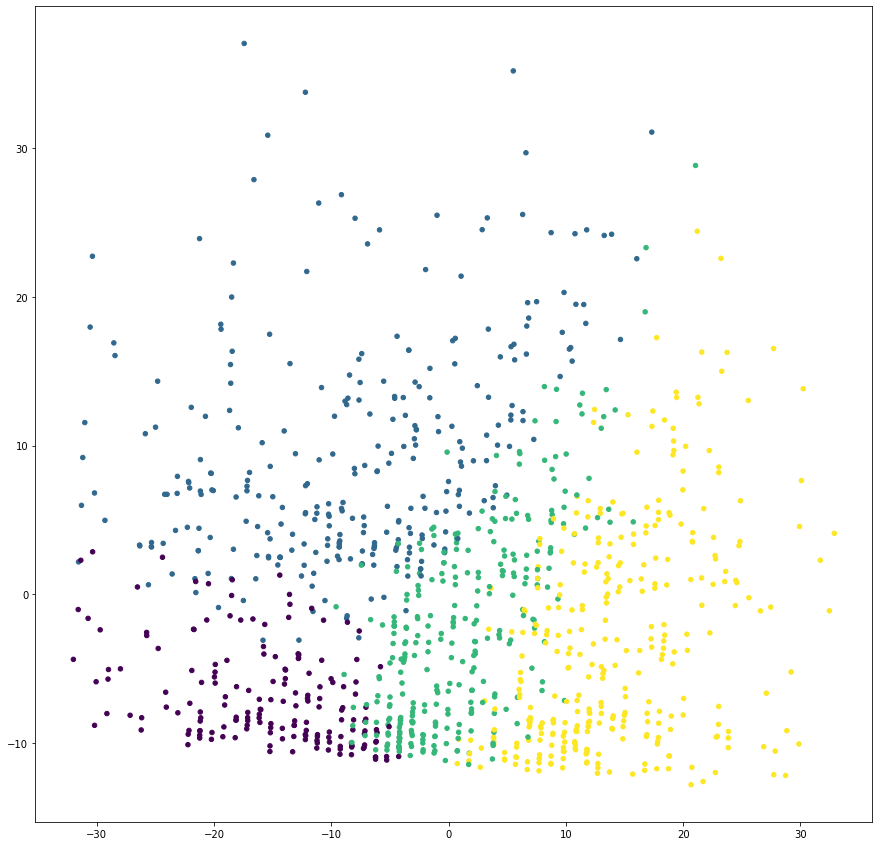

In [9]:
## Using PCA dimensionality reduction only to view clusters in a 2-D plane


from sklearn.decomposition import PCA
df = pd.DataFrame(X)
cols = df.columns[:-1]
df['Cluster'] = cluster_arr

pca = PCA(n_components=2)

df['x'] = pca.fit_transform(df[cols])[:,0]
df['y'] = pca.fit_transform(df[cols])[:,1]

fig = plt.figure(figsize=(15, 15))
plt.scatter(df['x'], df['y'], c=df['Cluster'], marker='o', s=20)